In [2]:
cd '/home/dpirvu/axion/'

/home/dpirvu/axion


In [3]:
import os,sys

print(sys.path)

#sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')

sys.path.append('/home/dpirvu/axion/hmvec-master/')
sys.path.append('/home/dpirvu/python_stuff/')

print(sys.path)

import hmvec as hm

from plotting import *
from compute_power_spectra import *
from params import *

%matplotlib inline

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/home/dpirvu/DarkPhotonxunWISE/hmvec-master', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython']
['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/axion/hmvec-master/', '/home/dpirvu/python_stuff/']


In [4]:
ellMax0 = 9600
ellMax = 8000

ellshort = np.array([0.] + np.geomspace(2, ellMax-1, 101).tolist())
ellshort = np.array([int(ii) for ii in ellshort])
ellshort = np.array(list(dict.fromkeys(ellshort)))

dictmasses = dictKey[:50]; print(len(dictmasses))
model = modelParams
rscale = False

allcols = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
cych = cycle(allcols)

epsilon= 1.e-20

baseline = ghztoev(145)
units = xov(baseline) * baseline

zreio = 1.9

zMin = 0.005
zMax = zreio

ndomains = [1., 5., 10.]

nZs  = 50
nMs  = 100

fsky = 0.4

nspec  = 3
nfreqs = 7

get_bispectrum_constr = True
compute_noise = False
get_constraints = True

rs  = np.linspace(1e-6, 1e2, 10000)              # halo radius

50


In [5]:
ms  = np.geomspace(1e11,1e17,nMs)   # masses
zs  = np.linspace(zMin,zreio,nZs)  # redshifts
ks  = np.geomspace(1e-4,1e3, 1001)  # wavenumbers

AGN_name = 'battagliaAGN'
unwise_color = 'blue'
choose_dict = 21
rscale = False

if unwise_color=='blue': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_0.txt"
elif unwise_color=='green': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_1.txt"

# Halo Model
hcos = hm.HaloModel(zs, ks, ms=ms, mass_function='tinker', mdef='vir', concmode='BHATTACHARYA', unwise_color=unwise_color, choose_dict=choose_dict)
hcos.add_hod(name=unwise_color)

print('Importing base CMB PS and adding T monopole.')
CMB_ps        = hcos.CMB_power_spectra()
lensedCMB     = CMB_ps['lensed_scalar']
lensedCMB     = lensedCMB[:ellMax0, :]
lensedCMB[0,0]= TCMB**2.

unlensedCMB     = CMB_ps['unlensed_scalar']
unlensedCMB     = unlensedCMB[:ellMax0, :]
unlensedCMB[0,0]= TCMB**2.

unwise_color blue choose_dict 21 hod_params {'hod_alphasat': 1.06, 'hod_siglogM': 0.02, 'hod_lambda': 1.8, 'hod_M1pr_satdivh': 4074000000000.0, 'hod_Mmin_cendivh': 489780000000.0}
Importing base CMB PS and adding T monopole.


3e-13
7e-13
9e-13


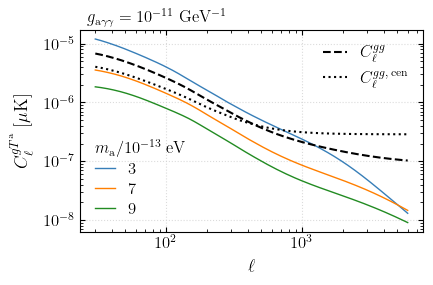

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.1))
cych = cycle(allcolors)

mm, mmm = 30, 6000
elss = np.arange(mm,mmm)

for mind, MA in enumerate(dictKey):
    if mind not in [10, 30, 36]: continue
    col = next(cych)
    print(MA)
    epsilon = 1e-20

    Cell_taug = np.load(cl_data_galtau_path(MA, nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
    Cell_taug*= epsilon**2. * TCMB * units
    ax.plot(elss, Cell_taug[mm:mmm], color=col, lw=1, label=r'${:.0f}$'.format(MA/1e-13))

Cell_galgal0 = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
l1, = ax.plot(np.arange(mm,mmm), Cell_galgal0[mm:mmm], color='k', ls='--')

Cell_galgal1 = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict)+'centrals_only_unWISE.npy')
l2, = ax.plot(np.arange(mm,mmm), Cell_galgal1[mm:mmm], color='k', ls=':')

secondary_labels = [r'$C_{\ell}^{gg}$', r'$C_{\ell}^{gg, {\rm \; cen}}$']
secondary_lines  = [l1, l2]
ax.add_artist(plt.legend(secondary_lines, secondary_labels, loc=1, framealpha=1, handlelength=1.4, frameon=False))

ax.text(0.02, 1.1, r'$g_{{\rm a}\gamma\gamma} = 10^{-11} {\rm \; GeV^{-1}}$', transform=ax.transAxes, verticalalignment='top')
beautify(ax, times=-90, ncol=1, ttl=r'$m_{\rm a} / 10^{-13} {\rm \; eV}$', loc=3)#bb=(1.,1.))
ax.set_xscale('log')
ax.set_yscale('log')
ymin, ymax = ax.get_ylim()
#ax.set_ylim((5e-8, ymax))
#ax.xaxis.set_label_coords(0.5, -70*0.0015)
ax.set_ylabel(r'$C_\ell^{g T^{\rm a}} {\rm \; [\mu K]}$',fontsize=13)
ax.set_xlabel(r'$\ell$',fontsize=13)
plt.tight_layout()
plt.savefig('./plots/cross-power-spectra.pdf')
plt.show()


In [7]:
%run './hmvec-master/plotting.py'

<Figure size 640x480 with 0 Axes>

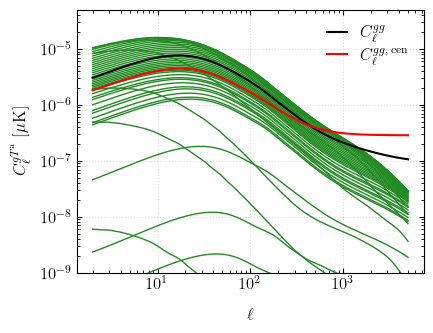

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))
cols = cycle(allcolors)
mm, mmm = 2, 5000
elss = np.arange(mm,mmm)

for mind, MA in enumerate(dictKey):

    Cell_taug = np.load(cl_data_galtau_path(MA, nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
    Cell_taug*= epsilon**2. * TCMB * units
    l2, = ax.plot(elss, Cell_taug[mm:mmm], lw=1, color=col)

Cell_gg = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
ax.plot(np.arange(mm,mmm), Cell_gg[mm:mmm],     color='k', label=r'$C_{\ell}^{gg}$')

Cell_gg_cen = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict)+'centrals_only_unWISE.npy')
ax.plot(np.arange(mm,mmm), Cell_gg_cen[mm:mmm], color='r', label=r'$C_{\ell}^{gg, {\rm \; cen}}$')

ax.set_xscale('log')
ax.set_yscale('log')
ymin, ymax = ax.get_ylim()
ax.set_ylim((1e-9, 5e-5))
ax.set_ylabel(r'$C_\ell^{g T^{\rm a}} {\rm \; [\mu K]}$')
ax.set_xlabel(r'$\ell$')
beautify(ax, times=-90)
plt.tight_layout()
#plt.savefig('./plots/curves_comparisons.pdf')
plt.show()


3e-13
6e-13
1.4e-12


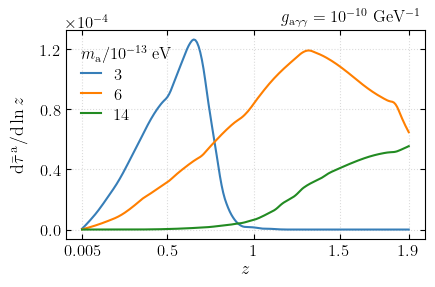

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.1))

dtaudz_vec = np.load('/home/dpirvu/axion/data/dtaudz_vec_data.npy')

cych = cycle(allcolors)
for mind, MA in enumerate(dictKey):
    if mind not in [10, 25, 40]: continue
    print(MA)

    epsilon = 1e-19
    fint = interpolate.interp1d(zs, epsilon**2 * dtaudz_vec[mind]*units / xov(baseline), kind='quadratic')
    zsnew = np.linspace(zs[0], zs[-1], 200)

    col = next(cych)
    ax.plot(zsnew, zsnew*fint(zsnew), color=col, label=r'${:.0f}$'.format(MA/1e-13), lw=1.5)

ax.text(0.6, 1.1, r'$ g_{{\rm a}\gamma\gamma} = 10^{-10} {\rm \; GeV^{-1}}$', transform=ax.transAxes, verticalalignment='top',\
       color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0'))
ax.ticklabel_format(axis='y', style='scientific', scilimits=[0.,0.])

a = [zs[0], 0.5, 1., 1.5, zs[-1]]
ax.set_xticks(a)
b = [r'${:.0f}$'.format(al) for al in a]
b[0] = r'${:.3f}$'.format(zs[0])
b[1] = r'${:.1f}$'.format(a[1])
b[3] = r'${:.1f}$'.format(a[3])
b[-1] = r'${:.1f}$'.format(zs[-1])
ax.set_xticklabels(b)

a = ax.get_yticks()[1:-1:2]
ax.set_yticks(a)

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.set_ylabel(r'${\rm d} \bar{\tau}^{\rm \, a} / {\rm d} \ln z $', fontsize=13)
ax.set_xlabel(r'$z$', fontsize=13)
beautify(ax, times=-70, ttl=r'$m_{\rm a} / 10^{-13} {\rm \; eV}$')
plt.tight_layout()
plt.savefig('./plots/dtaudz.pdf')
plt.show()

In [10]:
if False:
    PzkLinlin = hcos._get_matter_power(np.array([zs]), np.geomspace(1e-4,1,100), nonlinear=False)
    PzkLinnon = hcos._get_matter_power(np.array([zs]), np.geomspace(1e-4,1,100), nonlinear=True)

    fig, ax = plt.subplots(1, 1, figsize=(3.8, 2.6))
    plt.loglog(np.geomspace(1e-4,1,100), PzkLinlin[0], lw=1, color='k', label=r'$\rm Linear$')
    plt.loglog(np.geomspace(1e-4,1,100), PzkLinnon[0], lw=1, color='forestgreen', label=r'$\rm Non-Linear$')
    plt.xlabel(r'$k {\rm \, [Mpc^{-1}]}$', fontsize=14)
    plt.ylabel(r'$P(k)$', fontsize=14)
    beautify(ax, times=-100)
    plt.tight_layout()
    plt.savefig('./plots/linear-mat-pow.pdf')
    plt.show()

    print('Importing base CMB PS and adding T monopole.')
    CMB_ps        = hcos.CMB_power_spectra()
    lensedCMB     = CMB_ps['lensed_scalar']
    lensedCMB     = lensedCMB[:ellMax0, :]
    lensedCMB[0,0]= TCMB**2.

    unlensedCMB     = CMB_ps['unlensed_scalar']
    unlensedCMB     = unlensedCMB[:ellMax0, :]
    unlensedCMB[0,0]= TCMB**2.

    fig, ax = plt.subplots(1, 1, figsize=(3.8, 2.6))
    ellM = 2400
    ellMs = np.arange(2,ellM)
    plt.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * lensedCMB[2:ellM,0], lw=1,color='k', label=r'$\rm Lensed$')
    plt.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * unlensedCMB[2:ellM,0], lw=1,color='forestgreen', label=r'$\rm Unlensed$')
    plt.xlabel(r'$\ell$', fontsize=14)
    plt.ylabel(r'$\frac{\ell (\ell+1)}{2\pi} C_\ell^{TT} \, [\mu {\rm K}^2]$', fontsize=14)
    beautify(ax, times=-110)
    plt.tight_layout()
    plt.savefig('./plots/cmb_TT.pdf')
    plt.show()
    
    fig, ax_log = plt.subplots(1, 1, figsize=(4.5, 3.1))
    divider = make_axes_locatable(ax_log)
    ax = divider.append_axes("right", size=2.5, pad=0, sharey=ax_log)

    boundary = 100
    boundary_str = r'$100$'
    print(np.shape(zs))
    cych = cycle(allcolors)

    ellM = 2400
    ellMs = np.arange(2,ellM)

    ax_log.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * lensedCMB[2:ellM,0], lw=1,color='k')
    ax.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * lensedCMB[2:ellM,0], lw=1,color='k', label=r'$\rm Lensed$')
    ax_log.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * unlensedCMB[2:ellM,0], lw=1,color='forestgreen')
    ax.plot(ellMs, ellMs * (ellMs + 1)/(2.*np.pi) * unlensedCMB[2:ellM,0], lw=1,color='forestgreen', label=r'$\rm Unlensed$')

    ax_log.set_ylabel(r'$\frac{\ell (\ell+1)}{2\pi} C_\ell^{TT} \, [\mu {\rm K}^2]$', fontsize=14)
    ax.set_xlabel(r'$\ell$', fontsize=14)
    #ax.set_yscale('log')
    ax.set_xscale('linear')
    ax_log.set_xscale('log')
    ax_log.set_yscale('linear')
    ax.set_yscale('linear')

    ax_log.set_xlim((1, boundary))
    ax.set_xlim((boundary, ellM))

    beautify(ax_log, times=-360)
    beautify(ax, times=-100)

    ax.tick_params(direction='in', which='major',left=None)
    ax.tick_params(direction='in', which='minor',left=None)
    ax_log.tick_params(direction='in', which='major',right=None)
    ax_log.tick_params(direction='in', which='minor',right=None)

    ax_log.grid(which='major', ls=':', color='lightgray', alpha=0.8)
    ax_log.tick_params(direction='in', which='both', top=True, right=False, left=True)
    ax.grid(which='major', ls=':', color='lightgray', alpha=0.8)
    ax.tick_params(direction='in', which='both', top=True, right=True, left=False)

    ax_log.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    plt.setp(ax.get_yticklabels(), visible=False)

    ax.xaxis.set_label_coords(0.25, -70*0.0015)

    plt.tight_layout()
    plt.savefig('./plots/cmb_TT.pdf')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50,)
2e-13
3e-13
6e-13
1.4e-12


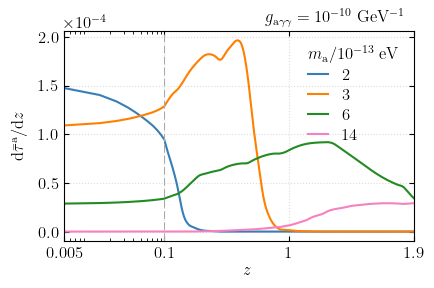

In [11]:
fig, ax_log = plt.subplots(1, 1, figsize=(4.5, 3.1))
divider = make_axes_locatable(ax_log)
ax = divider.append_axes("right", size=2.5, pad=0, sharey=ax_log)

boundary = 0.1
boundary_str = r'$0.1$'
dtaudz_vec = np.load('/home/dpirvu/axion/data/dtaudz_vec_data.npy')
print(np.shape(zs))
cych = cycle(allcolors)
for mind, MA in enumerate(dictKey):
    if mind not in [5, 10, 25, 40]: continue
    print(MA)

    epsilon = 1e-19
    fint = interpolate.interp1d(zs, epsilon**2 * dtaudz_vec[mind]*units / xov(baseline), kind='quadratic')
    zsnew = np.linspace(zs[0], zs[-1], 200)

    col = next(cych)
    ax_log.plot(zsnew, fint(zsnew), color=col)
    ax.plot(zsnew, fint(zsnew), color=col, label=r'${:.0f}$'.format(MA/1e-13))

ax.axvline(boundary, color='darkgray', ls='--')
ax.text(0., 1.1, r'$. \quad\quad\quad\quad\quad\quad  g_{{\rm a}\gamma\gamma} = 10^{-10} {\rm \; GeV^{-1}}$', transform=ax.transAxes, verticalalignment='top',\
       color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0'))
ax.text(0., 1.1, r'$gggg$', transform=ax.transAxes, verticalalignment='top',\
       color='white', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0'))

ax_log.set_ylabel(r'${\rm d} \bar{\tau}^{\rm a} / {\rm d} z $')
ax.set_xlabel(r'$z$')
#ax.set_yscale('log')
ax.set_xscale('linear')
ax_log.set_xscale('log')
ax_log.set_yscale('linear')

#asave = ax_log.get_yticks()[2:]
#print(asave)
#bsave = np.array([sci_notation(al) for al in asave])
#print(bsave)

ax_log.set_xlim((0.005, boundary))
ax.set_xlim((boundary, zs[-1]))

a = [zs[0]]#, 0.01]
ax_log.set_xticks(a)
b = [r'${:.0f}$'.format(al) for al in a]
b[0] = r'${:.3f}$'.format(a[0])
#b[1] = r'${:.2f}$'.format(a[1])
ax_log.set_xticklabels(b)

#a = ax.get_yticks()
#ax.set_yticks(a)
#b = [r'${:.1f}$'.format(al*1e7) for al in a]
#ax.set_yticklabels(b)

a = [boundary, 1., zs[-1]]
ax.set_xticks(a)
b = [r'${:.0f}$'.format(al) for al in a]
b[0] = boundary_str
b[-1] = r'${:.1f}$'.format(zs[-1])
ax.set_xticklabels(b)


beautify(ax_log, times=-250)
beautify(ax, times=-100, ttl=r'$m_{\rm a} / 10^{-13} {\rm \; eV}$')
ax.ticklabel_format(axis='y', style='scientific', scilimits=[0.,0.])

ax.tick_params(direction='in', which='major',left=None)
ax.tick_params(direction='in', which='minor',left=None)
ax_log.tick_params(direction='in', which='major',right=None)
ax_log.tick_params(direction='in', which='minor',right=None)

ax_log.grid(which='major', ls=':', color='lightgray', alpha=0.8)
ax_log.tick_params(direction='in', which='both', top=True, right=False, left=True)
ax.grid(which='major', ls=':', color='lightgray', alpha=0.8)
ax.tick_params(direction='in', which='both', top=True, right=True, left=False)

ax_log.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.setp(ax.get_yticklabels(), visible=False)

#ax_log.set_yticks(asave)
#ax_log.set_yticklabels(bsave)
ax.xaxis.set_label_coords(0.33, -70*0.0015)

plt.tight_layout()
plt.savefig('./plots/dtaudz-2.pdf')
plt.show()

In [12]:
def expsets(expname, experiment, TCMB, nfreqs):
    freqs = experiment['freqsGHz']
    if expname=='Planck':
        mm, mmm = 4, 4000
        Nell, Fell = get_noise_and_foregrounds_Planck(TCMB, elllim_Planck=mmm, nfreqs_Planck=nfreqs)

    elif expname=='CMBS4':
        mm, mmm = 4, 8000
        Nell, Fell = get_noise_and_foregrounds_S4(TCMB, elllim_S4=mmm, nfreqs_S4=nfreqs)
    return freqs, Nell, Fell, int(mm), int(mmm)


2.6e-13


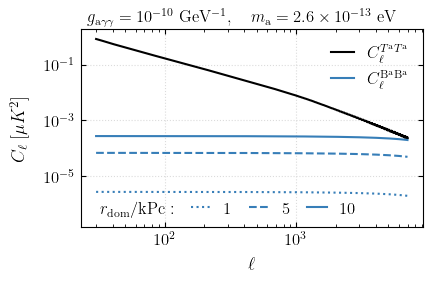

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.1))
cych = cycle(allcolors)

mm, mmm = 30, 7000
elss = np.arange(mm,mmm)

ellMax = 9000

secondary_lines, secondary_labels = [], []
for mind, MA in enumerate(dictKey):
    if mind not in [8]: continue
    print(MA)

    zMin, zMax, rMin, rMax = chooseModel(MA, model)
    zMax = min(zreio, zMax)
    unwise = True
    col = next(cych)
    ax.text(0.02, 1.1, r'$g_{{{{\rm a}}\gamma\gamma}} = 10^{{-10}} {{\rm \; GeV^{{-1}}}}, \quad m_{{\rm a}} = {:.1f} \times 10^{{-13}} {{\rm \; eV}}$'.format(MA/1e-13), transform=ax.transAxes, verticalalignment='top')
    for ndoi, ndom in enumerate(ndomains):
        lss = [':', '--', '-'][ndoi]

        data = import_data(MA, nZs, zMin, zMax, ellMax0, ndom, ellMax, unwise, rscale)
        rcross, prob, utheta, avtau, dtaudz, uell0, Cell1H, Cell2H, CMBDP = data

        epsilon = 1e-19
        Cell1H = epsilon**4. * Cell1H * TCMB**2. * units**2.
        Cell2H = epsilon**4. * Cell2H * TCMB**2. * units**2.
        CMBDP  = epsilon**4. * CMBDP * units**2. 

        if ndoi==0:
            ax.plot(elss, np.zeros(mmm-mm), label=r'$r_{{\rm dom}} / {\rm kPc}:$', ls='None')
            
        l2, = ax.plot(elss, CMBDP[1, mm:mmm], label=r'${:.0f}$'.format(ndom), color=col, ls=lss)
        if ndoi==1:
            l1, = ax.plot(elss, CMBDP[0, mm:mmm], color='k')
     #       ax.plot(elss, Cell1H[mm:mmm], color='k', ls='--')
     #       ax.plot(elss, Cell2H[mm:mmm], color='k', ls=':')

secondary_labels = [r'$C_{\ell}^{T^{\rm a}T^{\rm a}}$', r'$C_{\ell}^{\rm B^{\rm a}B^{\rm a}}$']
secondary_lines  = [l1, l2]
ax.add_artist(plt.legend(secondary_lines, secondary_labels, loc=1, framealpha=1, handlelength=1.4, frameon=False))

beautify(ax, times=-100, ncol=4, bb=(0.85,0.21))

ax.set_xscale('log')
ax.set_yscale('log')
ymin, ymax = ax.get_ylim()
ax.set_ylim((ymin/7, ymax*1.2))
ax.set_ylabel(r'$C_{\ell} \; [\mu K^2]$', fontsize=13)
ax.set_xlabel(r'$\ell$', fontsize=13)
plt.tight_layout()
plt.savefig('./plots/polarization-auto-power-spectra.pdf')
plt.show()

In [14]:
def sets(ax):
    legs, ax = beautify(ax, ttl=None, ncol=3, times=-70)
    [aa.legend(title=None, ncol=3, loc=3, bbox_to_anchor=None, borderpad=0.07, \
                frameon=False, handlelength=0.7, labelspacing=-0.3, columnspacing=0.5, handletextpad=0.2) for aa in ax]
    for leg in legs:
        leg._legend_box.align = "left"
 #   ax[0].set_ylim((5e-9,1e1))
 #   ax[1].set_ylim((5e-9,5e-1))
    ax[0].yaxis.set_label_coords(-120*0.0015, 0.5)
    for ai, ax in enumerate(ax):
        ax.set_xlabel(r'$\ell$', fontsize=13)
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.tight_layout()
    plt.savefig('./plots/ILC.pdf')
    plt.show()
    return


5e-13
1e-19


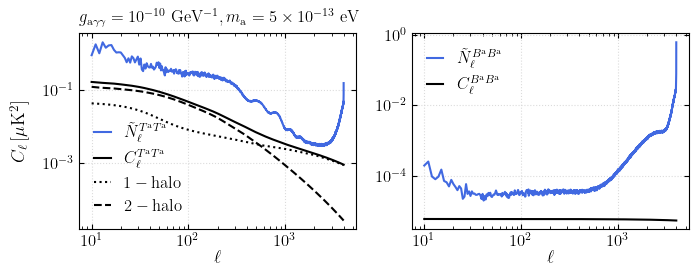

5e-13
1e-19


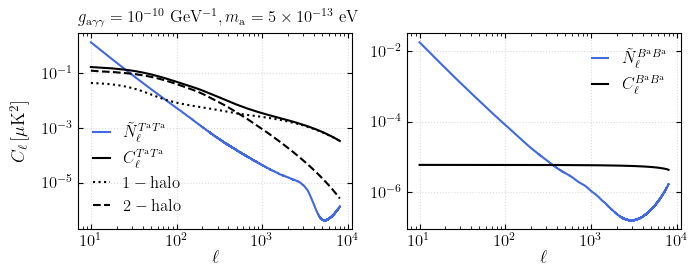

In [15]:
MFIX = 20
MA = dictmasses[MFIX]
lssp = ['--', ':']

for eid, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):

    freqs, Nell, Fell, mm, mmm = expsets(expname, experiment, TCMB, nfreqs)
    freqs = freqs[:nfreqs]
    mm = 10
    mmm = mmm
    elss = np.arange(mm,mmm)

    ILCnoise = np.load(ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname))
    ILCnoise_nofg = np.load(ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname)+'_nofg.npy')

#     fig = plt.figure(figsize=(10, 2.8))
#     ax = multisets(fig)
#     for ii, ij in enumerate(np.arange(len(ax)-1).tolist() + [0]):
#         l1, = ax[ii].plot(elss, lensedCMB[mm:mmm, ij],     lw=1, color='k', ls='-',  label=(r'$\rm Lensed \; CMB$' if ii==len(ax)-1 and eid==0 else None))
#         l3, = ax[ii].plot(elss, ILCnoise_nofg[ij, mm:mmm], lw=1, color='k', ls=lssp[eid], label=(r'$\rm ILC$' if ii==len(ax)-1 and eid==0 else None))

#         for fi, frq in enumerate(freqs[:7]):
#             lab = (r'${{\rm Model \;}}{:.0f}$'.format(frq) if ii==len(ax)-1 else None)
#             ax[ii].plot(elss, Nell[ij, mm:mmm, fi, np.mod(fi+0,len(freqs))], color=allcols[fi], linewidth=1, alpha=1, ls=lssp[eid], label=lab)
#     sets(ax)

    fig, ax = plt.subplots(1, 2, figsize=(7.1, 3.), )
    secondary_lines, secondary_labels = [], []

    ndom = 5
    Cell1Halo, Cell2Halo = np.load(cl_data_tautau_path(MA,nZs,zMin,zMax,ellMax0,rscale))
    scrTT = (Cell1Halo + Cell2Halo) * TCMB**2.
    scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
    screening = np.array([scrTT[:ellMax], scrEE[:ellMax], scrEE[:ellMax]]) * units**2.
    print(MA)
    epsilon = 1.e-19
    print(epsilon)
    screening = epsilon**4. * screening

    for ij, (ii, aa) in enumerate(zip([0,2], ax)):
        lab = [r'$\tilde{N}_{\ell}^{T^{\rm a}T^{\rm a}}$',r'$\tilde{N}_{\ell}^{E^{\rm a}E^{\rm a}}$',r'$\tilde{N}_{\ell}^{B^{\rm a}B^{\rm a}}$'][ii]
        aa.plot(elss, ILCnoise[ii, mm:mmm], color='royalblue', label=lab)

    ax[0].plot(elss, screening[0, mm:mmm], label=r'$C_{\ell}^{T^{\rm a} T^{\rm a}}$', color='k')
    ax[1].plot(elss, screening[1, mm:mmm], label=r'$C_{\ell}^{B^{\rm a} B^{\rm a}}$', color='k')
    ax[0].plot(elss, epsilon**4. * units**2. * TCMB**2. * Cell1Halo[mm:mmm], label=r'$1-{\rm {halo}}$', color='k', ls=':')
    ax[0].plot(elss, epsilon**4. * units**2. * TCMB**2. * Cell2Halo[mm:mmm], label=r'$2-{\rm {halo}}$', color='k', ls='--')

    ax[0].text(0, 1.12, r'$g_{{{{\rm a}}\gamma\gamma}} = 10^{{-10}} {{\rm \; GeV^{{-1}}}}, m_{{\rm a}} = {:.0f} \times 10^{{-13}} {{\rm \; eV}}$'.format(MA/1e-13), transform=ax[0].transAxes, verticalalignment='top')
    ax[0].set_ylabel(r'$C_{\ell} \, [\mu\rm{K}^2]$', fontsize=13)
  #  ax[1].set_ylabel(r'$C_{\ell} \, [\mu\rm{K}^2]$', fontsize=13)
    legs, ax = beautify(ax, ttl=None, ncol=3, times=-70)
    [aa.legend(title=None, ncol=1, bbox_to_anchor=None, frameon=False, handlelength=1, columnspacing=0.5) for aa in ax]
    for leg in legs:
        leg._legend_box.align = "left"
    ax[0].yaxis.set_label_coords(-120*0.0015, 0.5)
   # ax[1].yaxis.set_label_coords(-120*0.0015, 0.5)
    for ai, ax in enumerate(ax):
        ax.set_xlabel(r'$\ell$', fontsize=13)
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.tight_layout()
    fig.subplots_adjust(wspace=0.2)
    plt.savefig('./plots/ILC_signal_comp.pdf')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epsilon =  1e-19


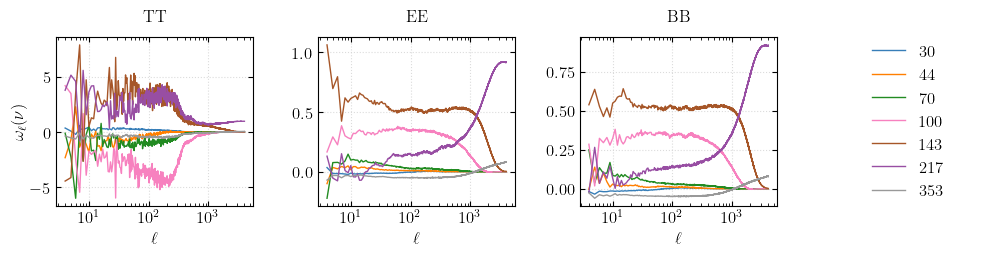

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epsilon =  1e-19


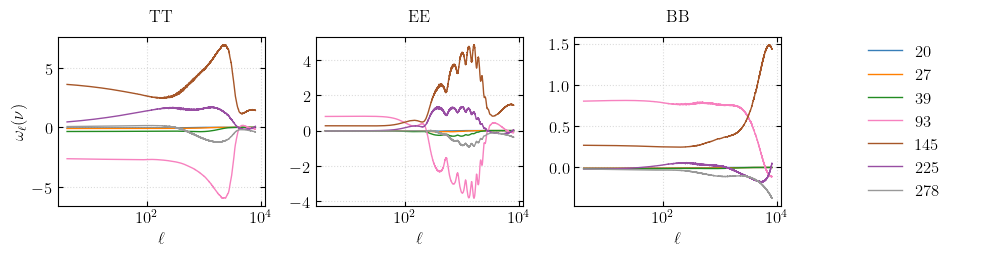

In [16]:
for expname, experiment in zip(['Planck', 'CMBS4'], [Planck, CMBS4]):
    fig = plt.figure(figsize=(10, 2.8))
    ax = multisets(fig)
    freqs, Nell, Fell, mm, mmm = expsets(expname, experiment, TCMB, nfreqs)
    freqs = freqs[:nfreqs]

    mind = 4
    MA = dictmasses[mind]
    print('epsilon = ', epsilon)

    lab0 = lambda ii: ('CMB' if ii==len(ax)-1 else None)
    lab1 = lambda ii: ('Screened CMB' if ii==len(ax)-1 else None)
    lab2 = lambda ii: ('Screening' if ii==len(ax)-1 else None)
    lab3 = lambda ii: ('ILC noise' if ii==len(ax)-1 else None)
    labfreq = lambda ii, frq: (r'${:.0f}$'.format(frq) if ii==len(ax)-1 else None)

    elss = np.arange(mm, mmm)
    for ii, ij in enumerate(np.arange(len(ax)-1).tolist() + [0]):
        ILCweights = np.load(weights_path(MA, nZs, zMin, zreio, ellMax0, expname))
        ILCweights_nofg = np.load(weights_path(MA, nZs, zMin, zreio, ellMax0, expname)+'_nofg.npy')

        for jj, frq in enumerate(freqs[:nfreqs]):
            ax[ii].plot(elss, ILCweights[ij, mm:mmm, jj], color=allcols[jj], lw=1, label=labfreq(ii, frq))
    #       ax[ii].plot(elss, ILCweights_nofg[ij, mm:mmm, jj], color=allcols[jj], ls=':', lw=1)

    beautify(ax, times=-100)
    clear_last_coln(ax)
    noiselab = [r'$C_\ell^{\rm TT}$', r'$C_\ell^{\rm EE}$', r'$C_\ell^{\rm BB}$', r'$C_\ell^{\rm TE}$']
    ax[0].set_ylabel(r'$\omega_\ell(\nu)$')
    for ai, ax in enumerate(ax[:-1]):
        ax.set_xlabel(r'$\ell$')
        ax.set_title([r'\rm TT', r'\rm EE', r'\rm BB'][ai])
        ax.set_xscale('log')
    plt.tight_layout()
    plt.savefig('./plots/weights'+str(expname)+'.pdf')
    plt.show()

#### Contour Plot

In [17]:
constraint = [r'$\left\langle T^{\rm a} T^{\rm a} \right\rangle $', \
              r'$\left\langle B^{\rm a} B^{\rm a} \right\rangle$', \
              r'$\left\langle T^{\rm a} g \right\rangle $', \
              r'$\left\langle B^{\rm a} B^{\rm a} g^{\rm cen} \right\rangle $']

constraint3= [r'$\left\langle T^{\rm a} T^{\rm a}, 1h \right\rangle $', \
              r'$\left\langle T^{\rm a} T^{\rm a}, 2h \right\rangle $', \
              r'$\left\langle T^{\rm a} T^{\rm a} g^{\rm cen} - 1{\rm h, \, unWISE} \right\rangle $', \
              r'$\left\langle T^{\rm a} T^{\rm a} g^{\rm cen} - 1{\rm h, \, ALL} \right\rangle $',\
              r'$\left\langle B^{\rm a} B^{\rm a} g^{\rm cen} - 1{\rm h, \, unWISE} \right\rangle $', \
              r'$\left\langle B^{\rm a} B^{\rm a} g^{\rm cen} - 2{\rm h, \, unWISE} \right\rangle $', \
              r'$\left\langle B^{\rm a} B^{\rm a} \right\rangle $']

def add_existing_constraints(ax, bool=True, ylims=(1e-14, 1e-9), xlims=(1e-15, 1e-9)):
    path_constr = './data/current_constraints/'
    cych = cycle(allcolors)

    labelscontours = np.array([r'${\rm SN}1987{\rm A-}\gamma$', \
                           r'$\rm Star \; Clusters$', \
                           r'${\rm NGC \;} 1275$'])

    data = np.genfromtxt(path_constr+'CAST_lim.txt')
    masses, data = data.T[0,:], data.T[1,:]
    plt.fill_between(masses, data, np.ones(len(masses)), color='gray', alpha=0.7)

    if True:
        coord, limit = np.load('./data/gas_contour.npy')
        col = 'royalblue'
        plt.fill_between(coord, limit/1e-9, np.ones(len(coord)), color=col, edgecolor=col)

        data = np.genfromtxt(path_constr+'SN1987A_gamma.txt')
        masses, data = data.T[0,:], data.T[1,:]
        l11, = plt.plot(masses, data, color='k', alpha=0.7)

        data = np.genfromtxt(path_constr+'Xray-SuperStarClusters_lim.txt')
        masses, data = data.T[0,:], data.T[1,:]
        l21, = plt.plot(masses[:-33], data[:-33], color='gray', alpha=0.7)

        data = np.genfromtxt(path_constr+'Chandra_NGC1275.txt')
        masses, data = data.T[0,:], data.T[1,:]
        l31, = plt.plot(masses[:-2], data[:-2], color='gray', alpha=0.3)

        secondary_lines = np.array([l11, l21, l31])
        secondary_labels = labelscontours

    if bool:
        ax.add_artist(plt.legend(secondary_lines, secondary_labels, ncol=3, columnspacing=0.8, handletextpad=0.5, framealpha=1, handlelength=.9, loc=3, frameon=False))

    plt.text(2e-13,  3.9e-9, r'$\rm FIRAS$', color='white', weight='bold')
    plt.text(4e-12, 7.3e-11, r'$\rm CAST$',  color='white', weight='bold', fontsize=13)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.ylabel(r'$g_{{\rm a}\gamma\gamma} \; [{\rm GeV^{-1}}]$', fontsize=13)
    plt.xlabel(r'$m_{\rm a} \; [{\rm eV}]$', fontsize=13)
    plt.xscale('log')
    plt.yscale('log')
    return ax


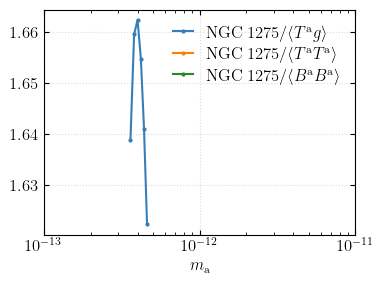

In [18]:
fig, ax = plt.subplots(1,1, figsize = (4.,3.))
colls = cycle(allcolors)

path_constr = './data/current_constraints/'
data = np.genfromtxt(path_constr+'Chandra_NGC1275.txt')
fint = interpolate.interp1d(data.T[0,:], data.T[1,:], kind='linear')
#plt.plot(data.T[0,:], data.T[1,:], color='gray', alpha=0.3)

#plt.plot(dictmasses, fint(dictmasses), marker='o', ms=2, color=next(colls), label=r'${\rm NGC \;} 1275$')

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    if eind==0: continue

    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data'+expname+'.npy')
    expnamelab = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

#    plt.plot(dictmasses, sigmaEpsilonList[1, :, 2], marker='o', ms=2, color=next(colls), label=constraint[2])

    thr = 1.6

    pasta1 = fint(dictmasses) / sigmaEpsilonList[1, :, 2]
    cds = np.argwhere(pasta1 > thr)
    plt.plot(dictmasses[cds], pasta1[cds], marker='o', ms=2, color=next(colls), label=r'${\rm NGC \;} 1275 / $'+constraint[2])

    pasta2 = fint(dictmasses) / sigmaEpsilonList[1, :, 0]
    cds = np.argwhere(pasta2 > thr)
    plt.plot(dictmasses[cds], pasta2[cds], marker='o', ms=2, color=next(colls), label=r'${\rm NGC \;} 1275 / $'+constraint[0])

    pasta3 = fint(dictmasses) / sigmaEpsilonList[1, :, 1]
    cds = np.argwhere(pasta3 > thr)
    plt.plot(dictmasses[cds], pasta3[cds], marker='o', ms=2, color=next(colls), label=r'${\rm NGC \;} 1275 / $'+constraint[1])

#plt.axhline(1., color='gray', alpha=0.3)
#ax.set_ylim((1e-13, 3e-8))
#plt.yscale('log')
ax.set_xlim((1e-13, 1e-11))
plt.xscale('log')
plt.xlabel(r'$m_{\rm a}$')
beautify(ax, times=-70)
plt.tight_layout()
plt.savefig('./plots/comparison_constr.pdf')
plt.show()

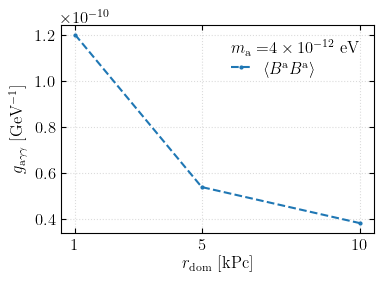

In [19]:
fig, ax = plt.subplots(1,1, figsize = (4,3.))
cych = cycle(allcolors)

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    if eind!=0: continue
    
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data'+expname+'.npy')
    expname = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

    met = 1
    ind = 34
    for mind, MA in enumerate(dictmasses):
        if mind!=ind: continue
        plt.plot(ndomains, sigmaEpsilonList[:, mind, met], label=(constraint[met] if mind==ind else None), ls='--', marker='o', ms=2)

a = ndomains
ax.set_xticks(a)
b = [r'${:.0f}$'.format(al) for al in a]
ax.set_xticklabels(b)

plt.xlabel(r'$r_{\rm dom} {\rm \; [kPc]}$')
plt.ylabel(r'$g_{{\rm a}\gamma\gamma} \; [{\rm GeV^{-1}}]$')
beautify(ax, times=-70, ttl=r'$m_{{\rm a}} = $'+sci_notation(MA, 0)+r'$ \; {\rm eV}$')
plt.tight_layout()
#plt.savefig('/home/dpirvu/axion/CristinaPlot_scaling_relation'+expname+'.pdf')
plt.show()


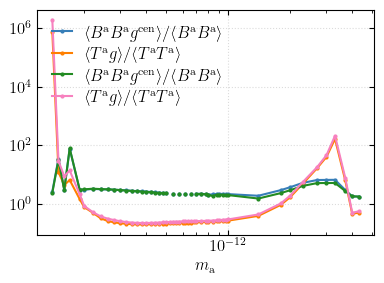

In [20]:
fig, ax = plt.subplots(1,1, figsize = (4.,3.))
colls = cycle(allcolors)

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data'+expname+'.npy')

    expnamelab = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

    pasta1 = sigmaEpsilonList[1, :, 3] / sigmaEpsilonList[1, :, 1]
    pasta2 = sigmaEpsilonList[1, :, 2] / sigmaEpsilonList[1, :, 0]

    plt.plot(dictmasses, pasta1, marker='o', ms=2, color=next(colls), label=constraint[3] + r'$/$'+ constraint[1])
    plt.plot(dictmasses, pasta2, marker='o', ms=2, color=next(colls), label=constraint[2] + r'$/$'+ constraint[0])

beautify(ax, times=-70, loc=2)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$m_{\rm a}$')
plt.tight_layout()
plt.savefig('./plots/comparison_constr.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


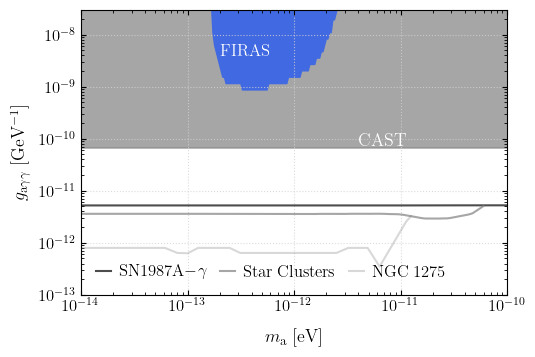

In [21]:
fig, ax = plt.subplots(1,1, figsize = (5.5,3.7))
add_existing_constraints(ax, ylims=(1e-13, 3e-8), xlims=(1e-14, 1e-10))
beautify(ax, times=-80)
plt.savefig('./plots/plain.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 50, 7)


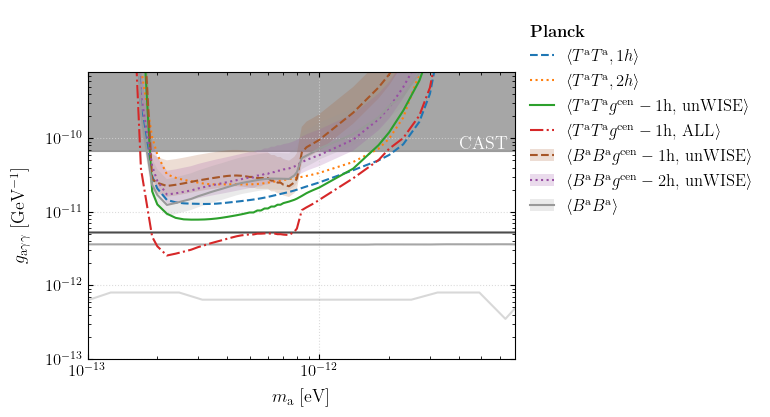

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 50, 7)


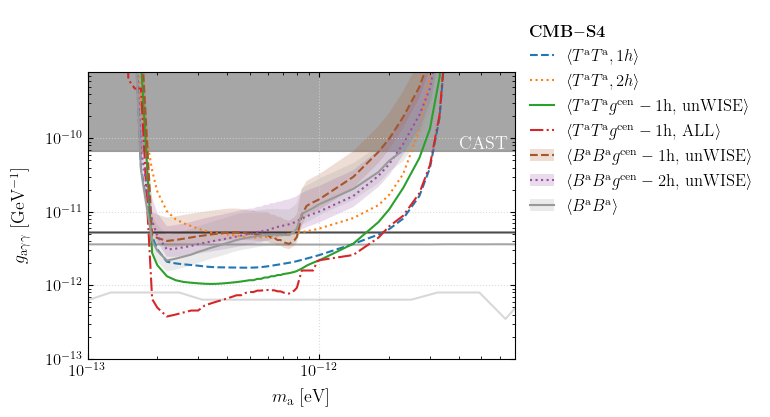

In [22]:
for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data2'+expname+'.npy')
    print(np.shape(sigmaEpsilonList))
    expname0 = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

    fig, ax = plt.subplots(1,1, figsize = (5.4,4.5))
    add_existing_constraints(ax, bool=False, ylims=(1e-13, 8e-10), xlims=(1e-13, 7e-12))
    #magnetic domains, #masses sampled, #forecast methods
    secondary_lines, secondary_labels = [], []
    lssss = cycle(['--', ':', '-', '-.'])
    cych = cycle(allcolors[::])
    for method in range(len(sigmaEpsilonList.T)):
        for ii, si in enumerate(sigmaEpsilonList[0,:,method]):
            if np.isnan(si):
                sigmaEpsilonList[:, ii, method] = sigmaEpsilonList[:, ii-1, method]

        if method in [3,6]:
            sigmaEpsilonList[:, 40, method] = sigmaEpsilonList[:, 40, method] / 1.5
            sigmaEpsilonList[:, 41, method] = sigmaEpsilonList[:, 41, method] / 1.2

        if method in [4,5,6]:
            col = next(cych)
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, color=col, ls=next(lssss))
            ycurve1 = sigmaEpsilonList[0, :, method]
            ycurve2 = sigmaEpsilonList[2, :, method]
            l2 = plt.fill_between(dictmasses, ycurve1, ycurve2, color=col, alpha=0.2, edgecolor=None)
            secondary_lines.append((l1,l2))
            secondary_labels.append(constraint3[method])
        else:
            col = next(cych)
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, ls=next(lssss))
            secondary_lines.append(l1)
            secondary_labels.append(constraint3[method])

    leg = ax.add_artist(plt.legend(secondary_lines, secondary_labels, title=expname0, framealpha=1, \
                             handlelength=1.4, bbox_to_anchor=(1,.45), frameon=False))
    leg._legend_box.align = "left"
    beautify(ax, times=-90)
    ax.xaxis.set_label_coords(0.5, -70*0.0015)
    plt.tight_layout()
    plt.savefig('./plots/alternative_constraints'+expname+'.pdf')
    plt.show()

/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


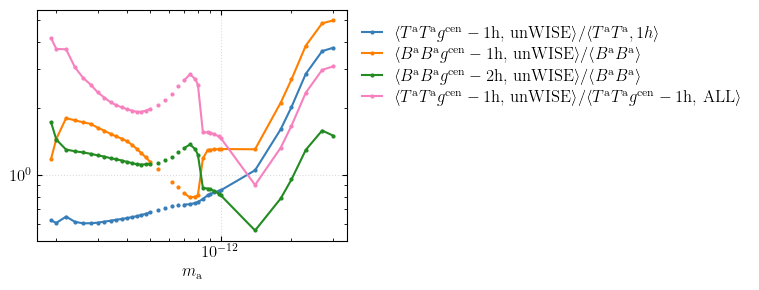

In [23]:
fig, ax = plt.subplots(1,1, figsize = (4.,3.))
colls = cycle(allcolors)

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data2'+expname+'.npy')
    if eind!=0: continue

    expnamelab = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

    pasta1 = sigmaEpsilonList[0, :, 2] / sigmaEpsilonList[0, :, 0]
    pasta2 = sigmaEpsilonList[0, :, 4] / sigmaEpsilonList[0, :, 6]
    pasta3 = sigmaEpsilonList[0, :, 5] / sigmaEpsilonList[0, :, 6]
    pasta4 = sigmaEpsilonList[0, :, 2] / sigmaEpsilonList[0, :, 3]

    l1, = plt.plot(dictmasses[4:-4], pasta1[4:-4], marker='o', ms=2, color=next(colls), label=constraint3[2] + r'$/$'+ constraint3[0])
    l1, = plt.plot(dictmasses[4:-4], pasta2[4:-4], marker='o', ms=2, color=next(colls), label=constraint3[4] + r'$/$'+ constraint3[6])
    l1, = plt.plot(dictmasses[4:-4], pasta3[4:-4], marker='o', ms=2, color=next(colls), label=constraint3[5] + r'$/$'+ constraint3[6])
    l1, = plt.plot(dictmasses[4:-4], pasta4[4:-4], marker='o', ms=2, color=next(colls), label=constraint3[2] + r'$/$'+ constraint3[3])

beautify(ax, times=-70, bb=(1.,1.))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\rm a}$')
plt.tight_layout()
plt.savefig('./plots/comparison_constr.pdf')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 50, 4)


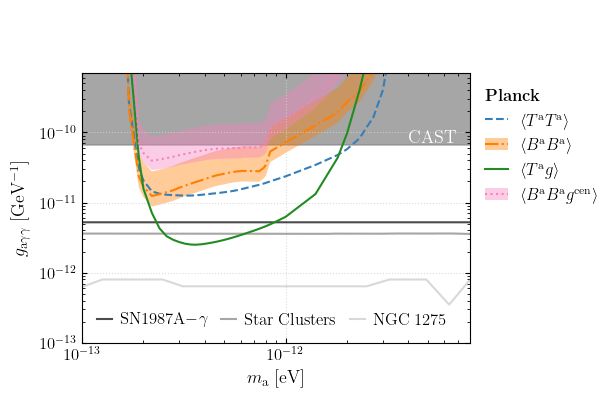

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 50, 4)


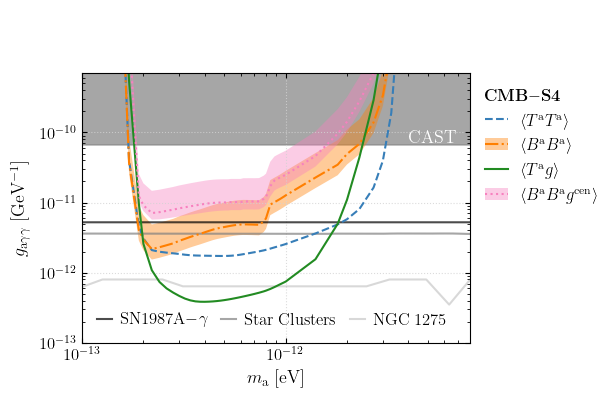

In [24]:
for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data'+expname+'.npy')
    print(np.shape(sigmaEpsilonList))
    expname0 = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

#    fig, ax = plt.subplots(1,1, figsize = (4.5,3.5))
    fig, ax = plt.subplots(1,1, figsize = (5,3.5))
    add_existing_constraints(ax, ylims=(1e-13, 7e-10), xlims=(1e-13, 8e-12))
    cych = cycle(allcolors[::])
    #magnetic domains, #masses sampled, #forecast methods
    secondary_lines, secondary_labels = [], []
    lssss = cycle(['--', '-.', '-', ':'])

    for method in range(len(sigmaEpsilonList.T)):
        for ii, si in enumerate(sigmaEpsilonList[0, :, method]):
            if np.isnan(si):
                sigmaEpsilonList[:, ii, method] = sigmaEpsilonList[:, ii-1, method]
        col = next(cych)

        if method in [1]:
            sigmaEpsilonList[:, 40, method] = sigmaEpsilonList[:, 40, method] / 1.35
            sigmaEpsilonList[:, 41, method] = sigmaEpsilonList[:, 41, method] / 1.2

        if method not in [1,3]:
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, color=col, ls=next(lssss))
            secondary_lines.append(l1)
            secondary_labels.append(constraint[method])
        else:
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, color=col, ls=next(lssss))#, marker='o', ms=1)
            ycurve1 = sigmaEpsilonList[0, :, method]
            ycurve2 = sigmaEpsilonList[2, :, method]
            l2 = plt.fill_between(dictmasses, ycurve1, ycurve2, color=col, alpha=0.4, edgecolor=None)
            secondary_lines.append((l1,l2))
            secondary_labels.append(constraint[method])

    leg = ax.add_artist(plt.legend(secondary_lines, secondary_labels, title=expname0, framealpha=1, \
                             handlelength=1.4, bbox_to_anchor=(1.,.46), frameon=False))
    leg._legend_box.align = "left"
    beautify(ax, times=-90)
    ax.xaxis.set_label_coords(0.5, -65*0.0015)
    plt.savefig('./plots/gas_contours'+expname+'.pdf', bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [25]:
x = hcos.omz(zs) - 1.
d = 18.*np.pi**2. + 82.*x - 39. * x**2.

dd = 178. * hcos.omz(zs)**(0.45)

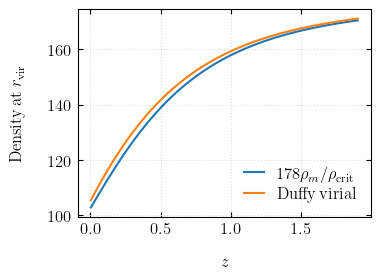

In [26]:
fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(zs, d, label=r'$178 \rho_m / \rho_{\rm crit}$')
plt.plot(zs, dd, label=r'$\rm Duffy \, virial$')
plt.ylabel(r'${\rm Density \, at \; } r_{\rm vir}$')
plt.xlabel(r'$z$')
beautify(ax, times=-120)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 50, 4)
(3, 50, 4)


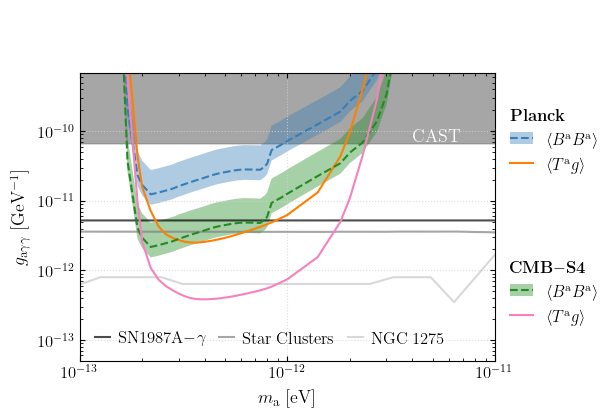

In [27]:
fig, ax = plt.subplots(1,1, figsize = (5.4,4.5))
add_existing_constraints(ax, ylims=(5e-14, 7e-10), xlims=(1e-13, 1e-11))
cych = cycle(allcolors[::])

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    sigmaEpsilonList = np.load('/home/dpirvu/axion/data/constraints_data'+expname+'.npy')
    print(np.shape(sigmaEpsilonList))
    expname0 = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]

    #magnetic domains, #masses sampled, #forecast methods
    secondary_lines, secondary_labels = [], []
    lssss = ['-', '--']

    for method in range(len(sigmaEpsilonList.T)):
        if method not in [1,2]: continue

        for ii, si in enumerate(sigmaEpsilonList[0, :, method]):
            if np.isnan(si):
                sigmaEpsilonList[:, ii, method] = sigmaEpsilonList[:, ii-1, method]
        col = next(cych)

        if method in [1]:
            sigmaEpsilonList[:, 40, method] = sigmaEpsilonList[:, 40, method] / 1.35
            sigmaEpsilonList[:, 41, method] = sigmaEpsilonList[:, 41, method] / 1.2

        if method not in [1,3]:
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, color=col, ls=lssss[method%2])
            secondary_lines.append(l1)
            secondary_labels.append(constraint[method])
        else:
            ycurve = sigmaEpsilonList[1, :, method]
            l1, = plt.plot(dictmasses, ycurve, color=col, ls=lssss[method%2])#, marker='o', ms=1)
            ycurve1 = sigmaEpsilonList[0, :, method]
            ycurve2 = sigmaEpsilonList[2, :, method]
            l2 = plt.fill_between(dictmasses, ycurve1, ycurve2, color=col, alpha=0.4, edgecolor=None)
            secondary_lines.append((l1,l2))
            secondary_labels.append(constraint[method])

    leg = ax.add_artist(plt.legend(secondary_lines, secondary_labels, title=expname0, framealpha=1, \
                             handlelength=1.4, bbox_to_anchor=[(1.,.6), (1.,.4)][eind], frameon=False))
    leg._legend_box.align = "left"
beautify(ax, times=-80)
ax.xaxis.set_label_coords(0.5, -65*0.0015)
plt.tight_layout()
plt.savefig('./plots/comparison.pdf')
plt.show()

[[[46.35214008  8.80105171]
  [ 8.83861985  1.27315006]]

 [[ 5.504806    1.52175988]
  [ 1.36790543  0.32422152]]

 [[ 2.25554604  0.67348545]
  [ 0.59940515  0.16357045]]]
[46.35214007  8.80105171]
[8.83861987 1.27315007]


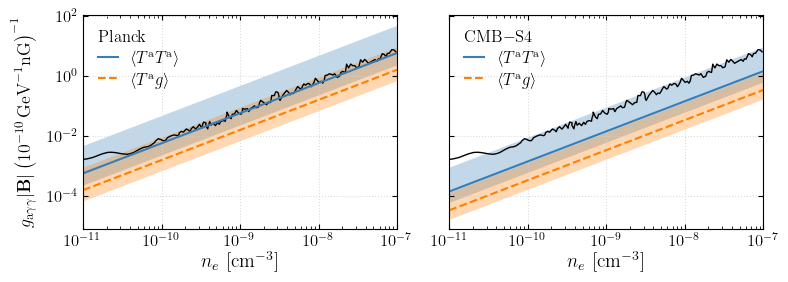

In [31]:
# Reproduce Fig. 2 from astro-ph/0506078
sigmaEpsilonList = np.load('/home/dpirvu/axion_new/data/constraints_data.npy')
print(sigmaEpsilonList)

fr1 = 0.7/0.21
fr2 = 0.76/0.35

# R_h = r_vir:
vir_Planck = np.array([13.90564202 * fr1, 4.05311592 * fr2])
vir_S4     = np.array([2.65158596 * fr1, 0.58631911 * fr2])

# R_h = 5 r_vir:
vir5_Planck= np.array([1.6514418 * fr1, 0.70081047 * fr2])
vir5_S4    = np.array([0.41037163 * fr1, 0.14931254 * fr2])

# R_h =10 r_vir:
vir10_Planck= np.array([0.67666381 * fr1, 0.31015777 * fr2])
vir10_S4    = np.array([0.17982154 * fr1, 0.07532849 * fr2])

print(vir_Planck)
print(vir_S4)

# Unit conversion, at 1/cm^3
Unit = 1.38e7
datas_vir_Planck = lambda x, ii: Unit * x * (3./4.) * vir_Planck[ii]
datas_vir5_Planck= lambda x, ii: Unit * x * (3./4.) * vir5_Planck[ii]
datas_vir10_Planck= lambda x, ii: Unit * x * (3./4.) * vir10_Planck[ii]
datas_vir_S4     = lambda x, ii: Unit * x * (3./4.) * vir_S4[ii]
datas_vir5_S4    = lambda x, ii: Unit * x * (3./4.) * vir5_S4[ii]
datas_vir10_S4    = lambda x, ii: Unit * x * (3./4.) * vir10_S4[ii]

fig, ax = plt.subplots(1,2, figsize = (8.,3.), sharey=True)

expname0 = [r'$\rm Planck$', r'$\rm CMB{-}S4$']
fig2_points = 10**(np.genfromtxt('./data/fig2_astro-ph-0506078.txt'))
[aa.plot(fig2_points[:, 0], fig2_points[:, 1], color='k', lw=1) for aa in ax]

for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    cych = cycle(allcolors[::])

    secondary_lines1, secondary_labels1 = [], []
    secondary_lines2, secondary_labels2 = [], []
    xrange = np.geomspace(1e-11, 1e-7, 100)
    for ii in range(2):
        col = next(cych)
        
        if eind==0:
            l1 = ax[0].fill_between(xrange, datas_vir_Planck(xrange,ii), datas_vir10_Planck(xrange,ii), color=col, alpha=0.3, linewidth=0.0)
            l2,= ax[0].plot(xrange, datas_vir5_Planck(xrange,ii), color=col, ls=['-','--'][ii], label=[constraint[0],constraint[2]][ii])
            secondary_lines1.append((l1,l2))

        else:
            l1 = ax[1].fill_between(xrange, datas_vir_S4(xrange,ii), datas_vir10_S4(xrange,ii), color=col, alpha=0.3, linewidth=0.0)
            l2,= ax[1].plot(xrange, datas_vir5_S4(xrange,ii), color=col, ls=['-','--'][ii], label=[constraint[0],constraint[2]][ii])
            secondary_lines2.append((l1,l2))

        secondary_labels.append(constraint[method])

beautify(ax[0], times=-100, ttl=expname0[0])
beautify(ax[1], times=-100, ttl=expname0[1])
lims = ax[0].get_xlim()
ax[1].set_xlim((lims))

[aa.set_xlim((xrange[0], xrange[-1])) for aa in ax]
[aa.set_xlabel(r'$n_e\ [{\rm cm}^{-3}]$ ', fontsize=14) for aa in ax]
ax[0].set_ylabel(r'$g_{{\rm a} \gamma\gamma} |\mathbf{B}| \left(10^{-10} \, {\rm GeV}^{-1} {\rm nG} \right)^{-1}$', fontsize=13)
#ax[0].set_ylabel(r'$\frac{g_{{\rm a} \gamma\gamma} }{10^{-10} \, {\rm GeV}^{-1}} \frac{|\mathbf{B}| }{{\rm nG}} $', fontsize=13)
[aa.set_xscale('log') for aa in ax]
[aa.set_yscale('log') for aa in ax]
[aa.xaxis.set_label_coords(0.5, -70*0.0015) for aa in ax]
plt.tight_layout()
plt.savefig('./plots/massless_axion.pdf')
plt.show()